In [1]:
%matplotlib widget
from mss import mss
from PIL import Image, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as pl

In [2]:
# This is where the screenshot happens
mon = {'top': 300, 'left': 10, 'width': 680, 'height': 125}
matrixShape = (76, 384)
sct = mss()
screenshot = sct.grab(mon)
img = np.array(screenshot)[:, :, 0]

In [3]:
img = Image.fromarray(img)
img = img.resize(matrixShape[::-1], Image.LANCZOS)
if np.sum(img) > 2000000:
    img = ImageOps.invert(img)

In [4]:
minval = 32  # np.percentile(pixvals, 2)
maxval = 171  # np.percentile(pixvals, 98)
pixvals = np.clip(img, minval, maxval)
pixvals = (pixvals - minval) / (maxval - minval)

pixvals[pixvals < 0.5] = 0.0
pixvals[pixvals >= 0.5] = 1.0

img = np.reshape(pixvals, matrixShape)

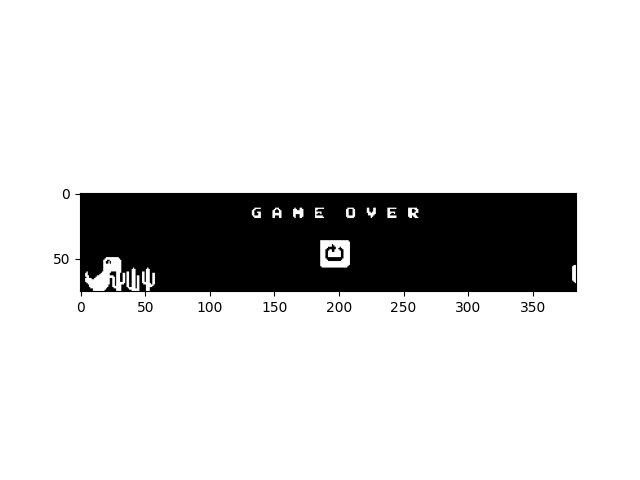

In [5]:
pl.imshow(img, cmap='gray')
pl.show()

In [6]:
img[7:22, 128:267].sum()

301.0

In [56]:
np.array(img).shape

(45, 230)

In [57]:
img.shape

(45, 230)